<a href="https://colab.research.google.com/github/Ikeoluwa-2004/ACCESS-SAP-Data-Science-Track/blob/main/Week3_Session5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
my_cleaned_data = pd.read_csv('/content/Cleaned_Sales_Data.csv')

# **DATA** **OVERVIEW** **AND** **INSPECTION**

In [43]:
my_cleaned_data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,DATE,TOTAL SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2020-01-01,2.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,2020-01-01,4.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,2020-01-01,1.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,2020-01-01,1.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,2020-01-01,0.82


In [44]:
my_cleaned_data.tail()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,DATE,TOTAL SALES
307640,2020,9,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.00,0.0,5.00,2020-09-01,5.00
307641,2020,9,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.12,37.0,240.75,2020-09-01,306.87
307642,2020,9,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,2.25,0.0,0.00,2020-09-01,2.25
307643,2020,9,BOSTON BEER CORPORATION,99990,SAM ADAMS SUMMER VARIETY 12PK NR,BEER,20.50,0.0,0.00,2020-09-01,20.50
307644,2020,9,NaN,WC,WINE CREDIT,REF,0.00,0.0,-70.00,2020-09-01,-70.00


In [45]:
my_cleaned_data.columns

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES',
       'DATE', 'TOTAL SALES'],
      dtype='object')

In [46]:
my_cleaned_data.shape

(307645, 11)

In [48]:
my_cleaned_data.isna().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,167
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,1
RETAIL SALES,3
RETAIL TRANSFERS,0
WAREHOUSE SALES,0
DATE,0


In [89]:
my_cleaned_data.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000,307642.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597,32.318915
std,1.083061,3.461812,30.986238,30.237195,249.916798,266.487535
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000,2.680000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000,10.500000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000,19491.000000


In [90]:
my_cleaned_data.columns.to_list()

['YEAR',
 'MONTH',
 'SUPPLIER',
 'ITEM CODE',
 'ITEM DESCRIPTION',
 'ITEM TYPE',
 'RETAIL SALES',
 'RETAIL TRANSFERS',
 'WAREHOUSE SALES',
 'DATE',
 'TOTAL SALES']

In [91]:
numeric = my_cleaned_data.columns[my_cleaned_data.dtypes != "object"]
cat = my_cleaned_data.columns[my_cleaned_data.dtypes == "object"]


In [92]:
print(numeric)
print(cat)

Index(['YEAR', 'MONTH', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES',
       'TOTAL SALES'],
      dtype='object')
Index(['SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE', 'DATE'], dtype='object')


In [93]:
#checking the number of unique values in the categorical column
for col in cat:
  print(col, my_cleaned_data[col].nunique())

SUPPLIER 396
ITEM CODE 34056
ITEM DESCRIPTION 34822
ITEM TYPE 8
DATE 24


In [94]:
print("\nNumeric summary (describe):")
display(my_cleaned_data.describe().T)


Numeric summary (describe):


,count,mean,std,min,25%,50%,75%,max
YEAR,307645.0,2018.438525,1.083061,2017.00,2017.0,2019.00,2019.0000,2020.00
MONTH,307645.0,6.423862,3.461812,1.00,3.0,7.00,9.0000,12.00
RETAIL SALES,307642.0,7.024071,30.986238,-6.49,0.0,0.32,3.2675,2739.00
RETAIL TRANSFERS,307645.0,6.936465,30.237195,-38.49,0.0,0.00,3.0000,1990.83
WAREHOUSE SALES,307645.0,25.294597,249.916798,-7800.00,0.0,1.00,5.0000,18317.00
TOTAL SALES,307642.0,32.318915,266.487535,-7800.00,1.0,2.68,10.5000,19491.00


In [95]:
print("\nCategorical overview (top values):")
for col in ['category','payment_mode','location','spending_level']:
    if col in my_cleaned_data.columns:
        print(f"\nTop values for {col}:")
        display(my_cleaned_data[col].value_counts().head(10))


Categorical overview (top values):


In [96]:
my_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
 9   DATE              307645 non-null  object 
 10  TOTAL SALES       307642 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 25.8+ MB


# **UNIVARIATE** **ANALYSIS**

In [71]:
my_cleaned_data["RETAIL SALES"]

,RETAIL SALES
0,0.00
1,0.00
2,0.00
3,0.00
4,0.82
...,...
307640,0.00
307641,66.12
307642,2.25
307643,20.50


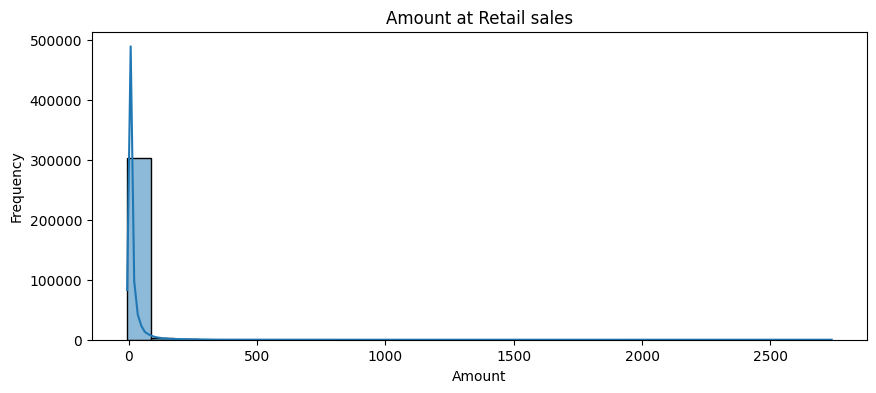

In [72]:
#histogram#
plt.figure(figsize=(10, 4))
sns.histplot(my_cleaned_data["RETAIL SALES"], bins = 30 , kde = True)
plt.title("Amount at Retail sales")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show();

Text(0, 0.5, 'Frequency')

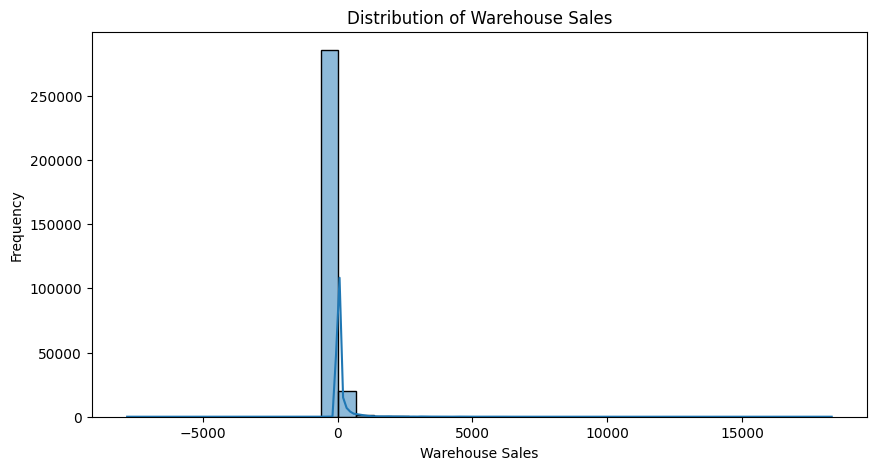

In [77]:
# Distribution of Warehouse Sales
plt.figure(figsize=(10, 5))
sns.histplot(my_cleaned_data['WAREHOUSE SALES'], bins=40, kde=True)
plt.title('Distribution of Warehouse Sales')
plt.xlabel('Warehouse Sales')
plt.ylabel('Frequency')

In [59]:
numeric

Index(['YEAR', 'MONTH', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES',
       'TOTAL SALES'],
      dtype='object')

In [60]:
my_cleaned_data["RETAIL SALES"]

,RETAIL SALES
0,0.00
1,0.00
2,0.00
3,0.00
4,0.82
...,...
307640,0.00
307641,66.12
307642,2.25
307643,20.50


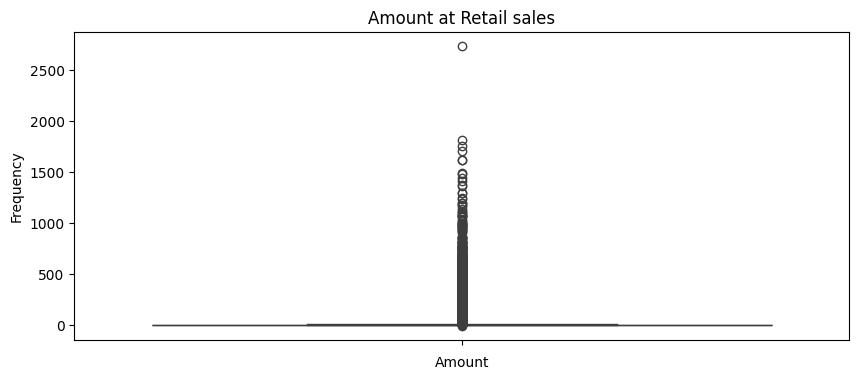

In [61]:
#boxplot#
plt.figure(figsize=(10, 4))
sns.boxplot(my_cleaned_data["RETAIL SALES"])
plt.title("Amount at Retail sales")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show();

CATEGORICAL ANALYSES

In [62]:
my_cleaned_data["SUPPLIER"]

,SUPPLIER
0,REPUBLIC NATIONAL DISTRIBUTING CO
1,PWSWN INC
2,RELIABLE CHURCHILL LLLP
3,LANTERNA DISTRIBUTORS INC
4,DIONYSOS IMPORTS INC
...,...
307640,LEGENDS LTD
307641,ANHEUSER BUSCH INC
307642,COASTAL BREWING COMPANY LLC
307643,BOSTON BEER CORPORATION


/tmp/ipython-input-4145957145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "MONTH" , data = my_cleaned_data , palette ="magma")


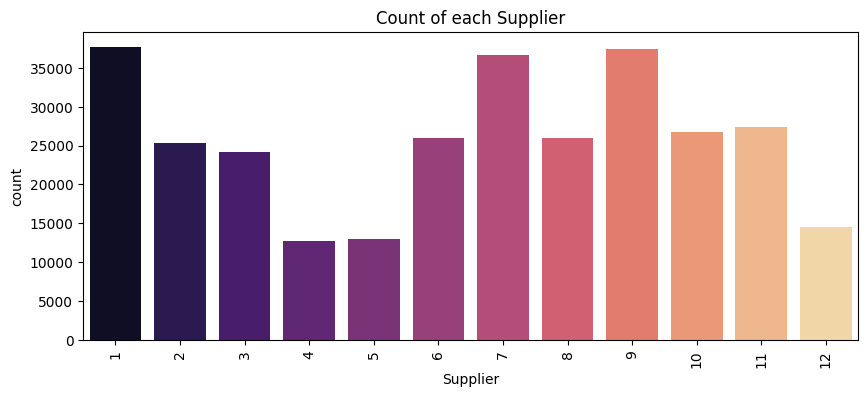

In [63]:

plt.figure(figsize=(10, 4))
sns.countplot(x = "MONTH" , data = my_cleaned_data , palette ="magma")
plt.xlabel("Supplier")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.title("Count of each Supplier")
plt.show();

# **BIVARIATE** **ANALYSES**

Text(0, 0.5, 'Total Sales')

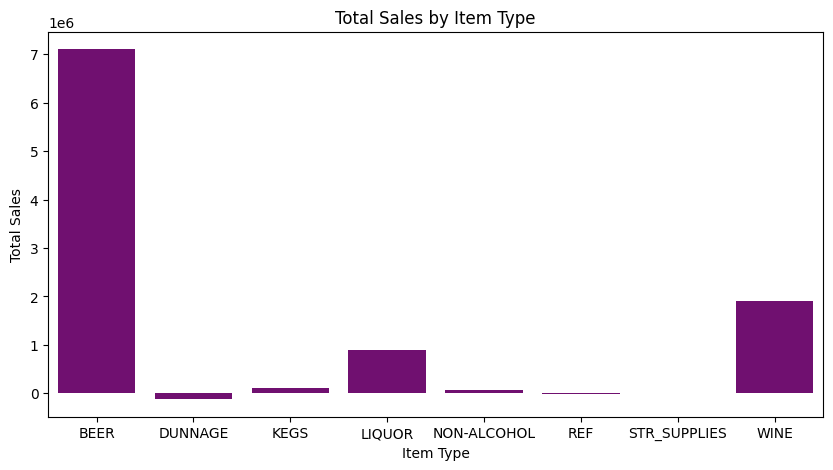

In [79]:
# Total Sales by Item Type
cat_total = my_cleaned_data.groupby('ITEM TYPE')['TOTAL SALES'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x = cat_total.index, y = cat_total.values, color='purple')

plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')

In [80]:
my_cleaned_data["ITEM DESCRIPTION"]

,ITEM DESCRIPTION
0,BOOTLEG RED - 750ML
1,MOMENT DE PLAISIR - 750ML
2,S SMITH ORGANIC PEAR CIDER - 18.7OZ
3,SCHLINK HAUS KABINETT - 750ML
4,SANTORINI GAVALA WHITE - 750ML
...,...
307640,DUTCHESS DE BOURGOGNE NR - 750ML
307641,HOEGAARDEN 4/6NR - 12OZ
307642,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ
307643,SAM ADAMS SUMMER VARIETY 12PK NR


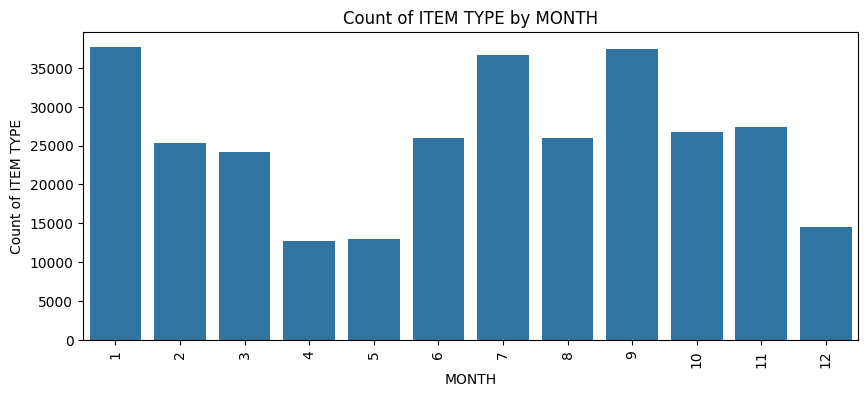

In [81]:
#ITEM DESCRIPTION BY MONTH (Count of Items)#
item_count_by_month = my_cleaned_data.groupby("MONTH")["ITEM TYPE"].count()
plt.figure(figsize=(10, 4))
sns.barplot(x = item_count_by_month.index , y = item_count_by_month.values)
plt.xlabel("MONTH")
plt.ylabel("Count of ITEM TYPE")
plt.title("Count of ITEM TYPE by MONTH")
plt.xticks(rotation= 90)
plt.show();

In [83]:
my_cleaned_data['ITEM TYPE'].value_counts()

,count
ITEM TYPE,
WINE,187640
LIQUOR,64910
BEER,42413
KEGS,10146
NON-ALCOHOL,1908
STR_SUPPLIES,405
REF,127
DUNNAGE,95


# **OUTLIER** **DETECTION**

In [85]:
def find_iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series[(series < lower) | (series > upper)]

outliers_amount = find_iqr_outliers(my_cleaned_data['TOTAL SALES'].dropna())
print("IQR-based outliers in TOTAL SALES (count):", outliers_amount.shape[0])
display(outliers_amount.tail())

IQR-based outliers in TOTAL SALES (count): 45011


,TOTAL SALES
307636,323.00
307637,58.00
307639,114.00
307641,306.87
307644,-70.00


In [86]:
my_cleaned_data.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,307645.0,2018.438525,1.083061,2017.00,2017.0,2019.00,2019.0000,2020.00
MONTH,307645.0,6.423862,3.461812,1.00,3.0,7.00,9.0000,12.00
RETAIL SALES,307642.0,7.024071,30.986238,-6.49,0.0,0.32,3.2675,2739.00
RETAIL TRANSFERS,307645.0,6.936465,30.237195,-38.49,0.0,0.00,3.0000,1990.83
WAREHOUSE SALES,307645.0,25.294597,249.916798,-7800.00,0.0,1.00,5.0000,18317.00
TOTAL SALES,307642.0,32.318915,266.487535,-7800.00,1.0,2.68,10.5000,19491.00


Text(0.5, 1.0, 'Distribution of Total Sales')

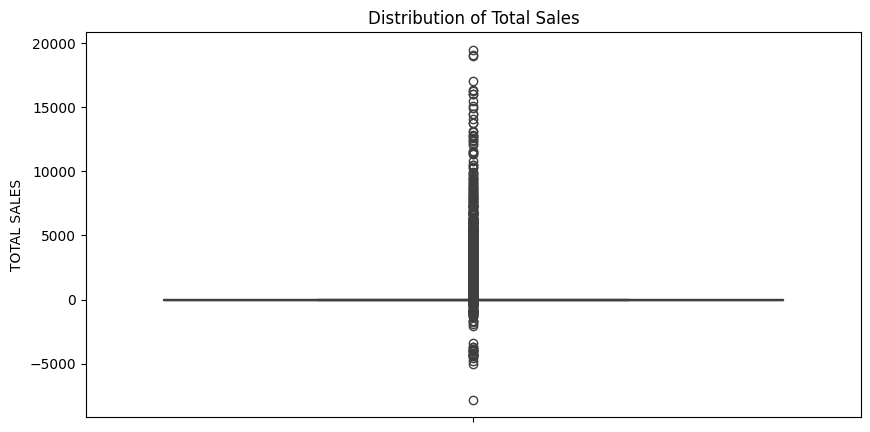

In [97]:
# Distribution of  Sales with Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(my_cleaned_data['TOTAL SALES'])
plt.title('Distribution of Total Sales')
# plt.xlabel('Total Sales')
# plt.ylabel('Frequency')
